# Figure 2

This notebook recreates Figure 2 in Rein & Tamayo 2016. The figure illustrates the use of second order variational equations together with Newton's method in a simple optimization problem.

We start by import the REBOUND, numpy and matplotlib packages. 

In [1]:
import rebound
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

We create an $N$-body simulation of two planets that runs for 10 orbits. The initial semi-major axis of the outer planet is a free parameter. We want to minimize the $x$ position of the outer planet after 10 orbits.

We create a function that runs one $N$-body simulation at a time. The function returns the $x$ coordinate of the inner planet as well as the corresponding coordinates of first and second order variational particles at the end of the simulation. The variational particles are initialized with the `vary()` function to correspond to varying the outer planet's semi-major axis. Note that this function is identical to the one for Figure 1. 

In [4]:
def run_sim_var(a):
    sim = rebound.Simulation()
    sim.add(m=1.)
    sim.add(primary=sim.particles[0],m=1e-3, a=1)
    sim.add(primary=sim.particles[0],m=1e-3, a=a)
    var_da = sim.add_variation()
    var_dda = sim.add_variation(order=2,first_order=var_da)
    var_da.vary(2,"a")
    var_dda.vary(2,"a")
    
    sim.integrate(2.*np.pi*10.)
    return sim.particles[1].x, var_da.particles[1].x, var_dda.particles[1].x

To find the local optimum where $x$ is minimal, we run Newton's method for 14 iterations. We start at $a=1.56$. This is the value indicate by the a red dot in Figure 1.

In [5]:
N=14
a = 1.56
x_chain = np.zeros(N)
for i in range(N):
    x, dxda, ddxdda = run_sim_var(a)
    x_chain[i] = x
    Delta_a = -dxda/ddxdda
    a += Delta_a

To illustrate the fast convergence of Newton's method, we plot the relative error of the inner planet's final position from the *optimum*. We here choose the final value in the iteration as the optimum. 

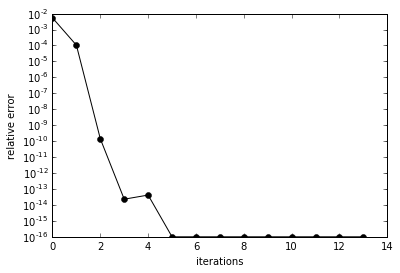

In [6]:
fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)
ax.set_xlabel("iterations")
ax.set_ylabel("relative error")
ax.set_yscale('log')
ax.plot(range(N), np.fabs((x_chain-x_chain[-1])/x_chain[-1])+1e-16,"ro-", color="black")
plt.savefig('paper_test2.pdf',bbox_inches='tight') 

Note that the Newton's method will only find a local optimum. We use Newton's method because it is the simplest derivate based optimization method. Better and more reliable derivate based optimization algorithm exist.